In [22]:
import os, sys

import pycbc

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import config
config.conf_matplolib()
#import nrcatalogtools

In [24]:
# Parameters
M = 60
mass_ratio = 0.667
mass_2 = M*mass_ratio/(1+mass_ratio)
mass_1 = M/(1+mass_ratio)
D = 1000
inc = 0
coa_phase = 0
sampling_frequency=4096
delta_t = 1./sampling_frequency

In [25]:
mass_1

35.99280143971205

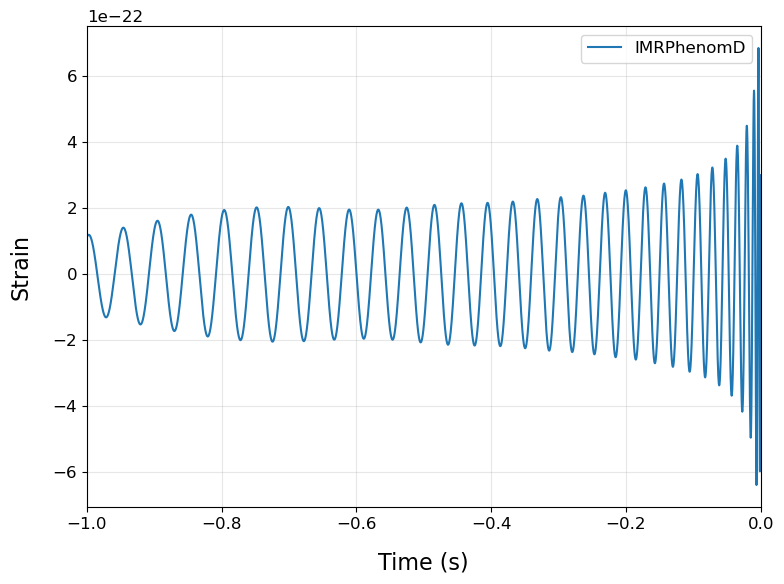

In [26]:
from pycbc.waveform import get_td_waveform


for apx in ['IMRPhenomD']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=mass_1,
                                 mass2=mass_2,
                                 delta_t=delta_t,
                                 f_lower=20,
                                 distance=D,
                                 inclination=inc,
                                 coa_phase=coa_phase,
                                 f_ref=20)

    plt.plot(hp.sample_times, hp, label=apx)

plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.xlim(-1, 0)
plt.legend()
plt.show()

In [27]:
from waveformtools.waveformtools import taper

In [28]:
help(taper)

Help on function taper in module waveformtools.waveformtools:

taper(data, delta_t=1, zeros=150)
    A method to taper and append additional zeros
    at either ends, using the `taper` function of
    the pycbc TimeSeries object.
    
    Parameters
    ----------
    data : 1d array or a pycbc TimeSeries
           The waveform data
    delta_t : float
              The timestepping.
    zeros : int
            The number of zeros to be added.
    
    Returns
    -------
    tapered_data : 1d array or a pycbc TimeSeries
                   The waveform data tapered and zero padded.
    
    Notes
    -----
    See `taper_timeseries` from pycbc.waveform.utils for more details.



In [29]:
len(hp)*delta_t

16.0

In [9]:
4/delta_t

16384.0

In [30]:
hp_tap = hp
hc_tap = hc

In [10]:
nz = int((8192 - 2150)/2)

In [11]:
hp_tap = taper(hp, zeros=nz)
hc_tap = taper(hc, zeros=nz)

In [16]:
len(hp_tap)*delta_t

17.47509765625

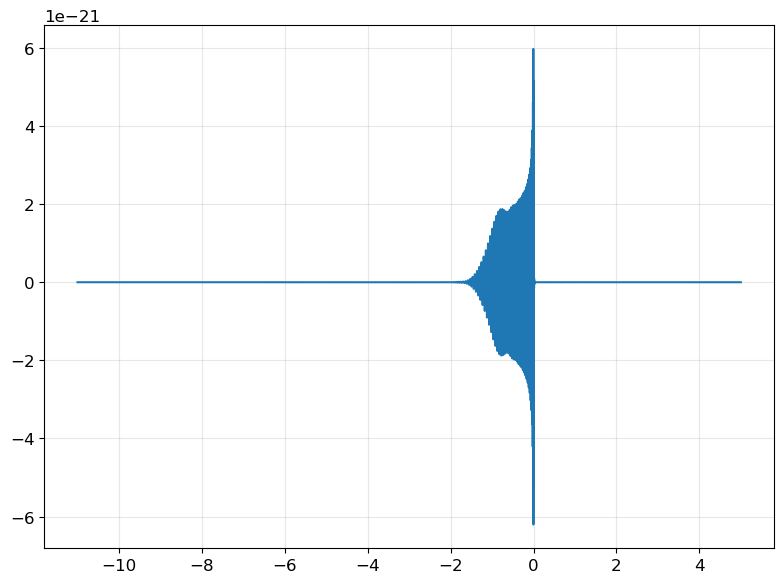

In [19]:
plt.plot(hp_tap.sample_times, hp_tap)

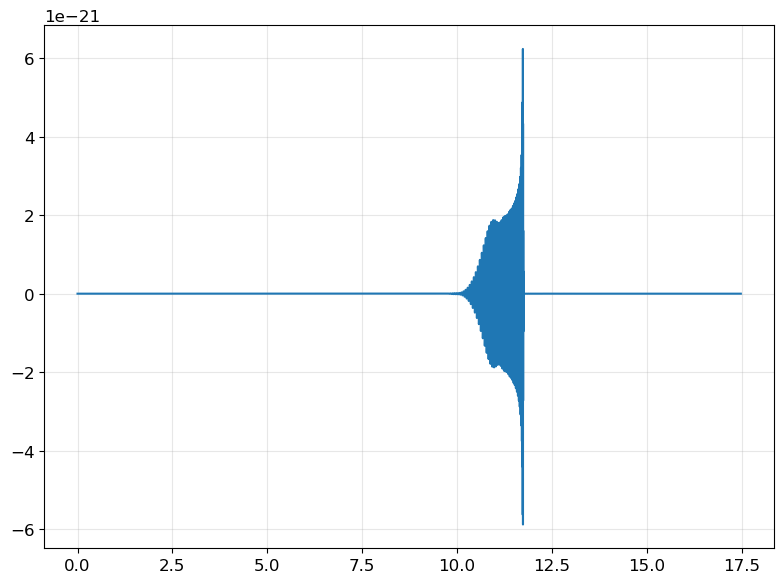

In [13]:
plt.plot(hc_tap.sample_times, hc_tap)

In [20]:
maxloc = np.argmax( hp_tap**2 + hc_tap**2)

maxtime = hp_tap.sample_times[maxloc]
maxtime



-0.003662109375

In [45]:
hp_tap.

AttributeError: property 'sample_times' of 'TimeSeries' object has no setter

In [30]:
np.array(hp_tap.sample_times)[-1] - np.array(hp_tap.sample_times)[0]

2.52490234375

In [31]:
hp_fs = hp_tap.to_frequencyseries()
hc_fs = hc_tap.to_frequencyseries()

In [32]:
faxis = hp_fs.sample_frequencies

In [33]:
np.array(hp_fs)

array([-6.73166701e-25+0.00000000e+00j,  5.28130188e-25+5.32506575e-25j,
        1.38524554e-25-9.33568870e-25j, ...,
        5.87546164e-30+8.67989924e-30j, -1.04727184e-29+4.48438196e-31j,
        5.11097250e-30-9.15010987e-30j])

In [34]:
np.array(hp_fs)

array([-6.73166701e-25+0.00000000e+00j,  5.28130188e-25+5.32506575e-25j,
        1.38524554e-25-9.33568870e-25j, ...,
        5.87546164e-30+8.67989924e-30j, -1.04727184e-29+4.48438196e-31j,
        5.11097250e-30-9.15010987e-30j])

In [35]:
faxis

/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gw/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


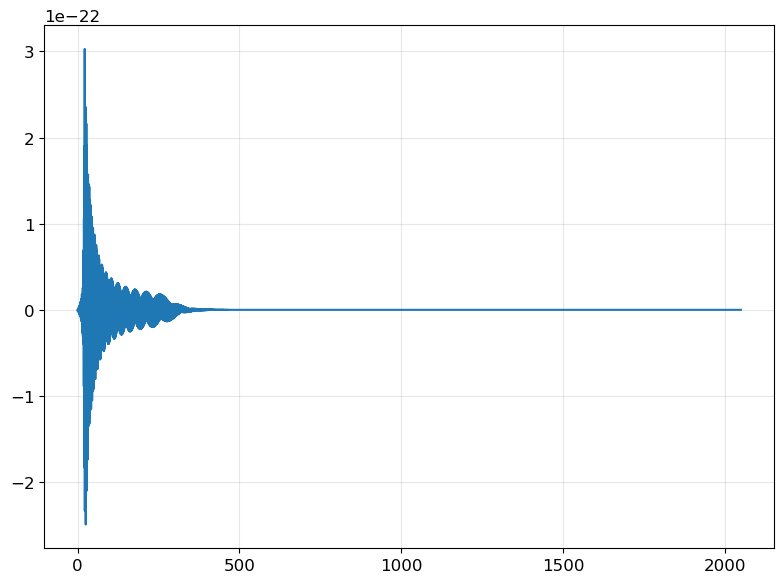

In [36]:
plt.plot(faxis, hp_fs)
#plt.xlim(20, 25)

In [31]:
np.savetxt("prepared_waveform_imr_tseries_IMRD_2.txt", np.array([hp_tap.sample_times, np.array(hp_tap), np.array(hc_tap)]).T)

In [38]:
np.savetxt("prepared_waveform_imr_fseries_2.txt", np.array([np.array(faxis).real, np.array(hp_fs).real, np.array(hc_fs).real]).T)